# Online Payments Fraud Detection

        Online payment frauds can happen with anyone using any payment system, especially while making payments using a credit card. That is why detecting online payment fraud is very important for credit card companies to ensure that the customers are not getting charged for the products and services they never paid.
        
        To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
df = pd.read_csv('paymentDataset.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.shape

(6362620, 11)

In [8]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature step :743
The number of values for feature type :5 -- ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
The number of values for feature amount :5316900
The number of values for feature nameOrig :6353307
The number of values for feature oldbalanceOrg :1845844
The number of values for feature newbalanceOrig :2682586
The number of values for feature nameDest :2722362
The number of values for feature oldbalanceDest :3614697
The number of values for feature newbalanceDest :3555499
The number of values for feature isFraud :2 -- [0 1]
The number of values for feature isFlaggedFraud :2 -- [0 1]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

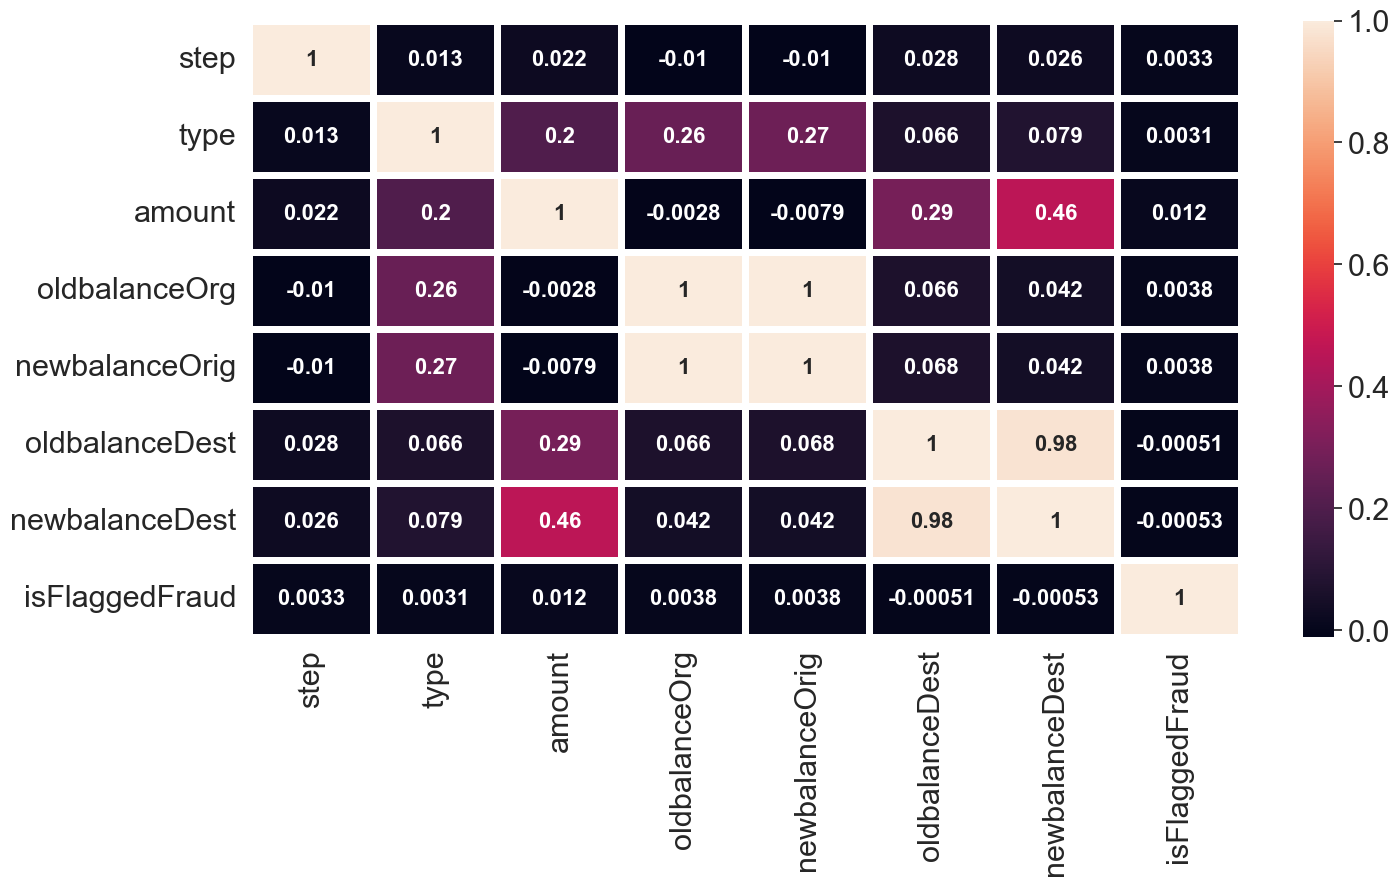

In [61]:
scale = 0.2
fig = plt.figure(figsize=(scale*80, scale*40))  #scale the desired size, which in my case is (24, len(df.columns))
sns.set(font_scale=scale*10)
sns.heatmap(df.corr(),annot=True,annot_kws={"fontsize": scale*80, "weight": "bold"},linewidths=5)
plt.show()

In [19]:
# Checking correlation
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


<AxesSubplot:xlabel='isFraud', ylabel='Count'>

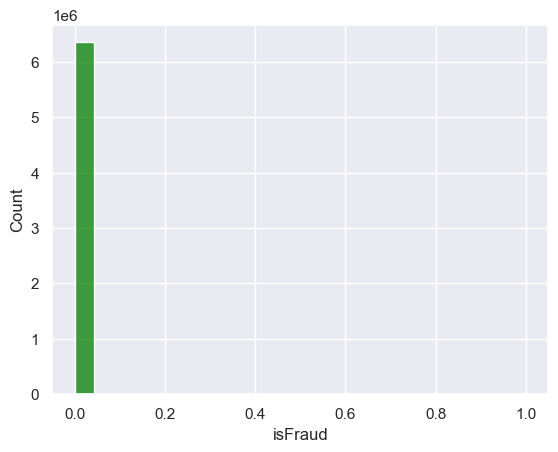

In [20]:
sns.histplot(df['isFraud'],color='green')

In [62]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [33]:
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [34]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [36]:
from sklearn.model_selection import train_test_split

In [43]:
x=np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
x


array([[2.00000000e+00, 9.83964000e+03, 1.70136000e+05, 1.60296360e+05],
       [2.00000000e+00, 1.86428000e+03, 2.12490000e+04, 1.93847200e+04],
       [4.00000000e+00, 1.81000000e+02, 1.81000000e+02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.31140928e+06, 6.31140928e+06, 0.00000000e+00],
       [4.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00]])

In [45]:
y=df['isFraud']
y=y.values
y

array(['No Fraud', 'No Fraud', 'Fraud', ..., 'Fraud', 'Fraud', 'Fraud'],
      dtype=object)

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.1, random_state=52)

In [48]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [49]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'sgd':make_pipeline(StandardScaler(), SGDClassifier()),
    'dtc':make_pipeline(DecisionTreeClassifier()),
    'knn':make_pipeline(KNeighborsClassifier(n_neighbors=3)),
}

In [50]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf', 'sgd', 'dtc', 'knn'])

In [51]:
from tqdm import tqdm_notebook as tqdm

In [53]:
#training step fit = train
fit_models = {}
for algo, pipeline in tqdm(pipelines.items()):
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model

C:\Users\nciri\AppData\Local\Temp\ipykernel_15368\860775562.py:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/6 [00:00<?, ?it/s]

In [54]:
from sklearn.metrics import accuracy_score # Accuracy metrics performance
import pickle 

In [55]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9990884258371552
rc 0.9987819483168884
rf 0.9997485312654221
sgd 0.9987960934332083
dtc 0.9997060959164621
knn 0.9996337986552709


In [59]:
with open('knn.pkl', 'wb') as f: #save the modle binary data
    pickle.dump(fit_models['knn'], f)

In [56]:
# prediction
for algo, model in fit_models.items():
    #features = [type, amount, oldbalanceOrg, newbalanceOrig]
    features = np.array([[4, 9000.60, 9000.60, 0.0]])#fraud
    print(algo,model.predict(features))

lr ['No Fraud']
rc ['No Fraud']
rf ['Fraud']
sgd ['No Fraud']
dtc ['Fraud']
knn ['Fraud']


        rtc dtc give the correct value.this is how we can detect online payments fraud with machine learning using Python. Detecting online payment frauds is one of the applications of data science in finance.